In [8]:
import numpy as np
import pandas as pd
import requests
import json

[Swarmplot Documentation](https://seaborn.pydata.org/generated/seaborn.swarmplot.html)

A swarmplot is essentially a scatterplot without overlapping marks

[Formula 1 Data via Ergast](http://ergast.com/mrd/)

API access to Formula 1 data used for this example 

In [62]:
# Ergast F1 Data URL format:
# https://ergast.com/api/<series>/<season>/<round>/..

# <series> = 'f1'
# <season> = 4 digit integer
# <round> = 1 or 2 digit integer // optional

# Default response is XML. Append .json to get .JSON response

# Results limited by 'limit'. Max 1000, Default 30

# Pitstop URL format: http://ergast.com/api/f1/2011/5/pitstops

#Test API call 
baseurl = 'http://ergast.com/api/f1/'
year = 2019
race = 21 #20 rounds in 2019

pitstop_url = baseurl + str(year) +'/'+ str(race) + '/pitstops.json'

print(pitstop_url)

#requests documentation: https://requests.readthedocs.io/en/master/user/quickstart/

response = requests.get(pitstop_url)
print(response.status_code)

#browse data using json.dumps for formatting
pit_data = response.json()

print(json.dumps(pit_data, sort_keys=True, indent=4))

http://ergast.com/api/f1/2019/21/pitstops.json
200
{
    "MRData": {
        "RaceTable": {
            "Races": [
                {
                    "Circuit": {
                        "Location": {
                            "country": "UAE",
                            "lat": "24.4672",
                            "locality": "Abu Dhabi",
                            "long": "54.6031"
                        },
                        "circuitId": "yas_marina",
                        "circuitName": "Yas Marina Circuit",
                        "url": "http://en.wikipedia.org/wiki/Yas_Marina_Circuit"
                    },
                    "PitStops": [
                        {
                            "driverId": "stroll",
                            "duration": "28.842",
                            "lap": "5",
                            "stop": "1",
                            "time": "17:22:34"
                        },
                        {
                     

In [63]:
pitstops = pit_data['MRData']['RaceTable']['Races'][0]['PitStops']

print(pitstops)

[{'driverId': 'stroll', 'lap': '5', 'stop': '1', 'time': '17:22:34', 'duration': '28.842'}, {'driverId': 'norris', 'lap': '8', 'stop': '1', 'time': '17:27:40', 'duration': '22.974'}, {'driverId': 'giovinazzi', 'lap': '8', 'stop': '1', 'time': '17:27:52', 'duration': '21.977'}, {'driverId': 'ricciardo', 'lap': '11', 'stop': '1', 'time': '17:32:58', 'duration': '21.904'}, {'driverId': 'leclerc', 'lap': '12', 'stop': '1', 'time': '17:34:14', 'duration': '21.697'}, {'driverId': 'vettel', 'lap': '12', 'stop': '1', 'time': '17:34:22', 'duration': '25.771'}, {'driverId': 'sainz', 'lap': '12', 'stop': '1', 'time': '17:34:43', 'duration': '21.928'}, {'driverId': 'albon', 'lap': '13', 'stop': '1', 'time': '17:36:11', 'duration': '22.028'}, {'driverId': 'hulkenberg', 'lap': '18', 'stop': '1', 'time': '17:45:13', 'duration': '21.578'}, {'driverId': 'grosjean', 'lap': '18', 'stop': '1', 'time': '17:45:37', 'duration': '21.968'}, {'driverId': 'kevin_magnussen', 'lap': '20', 'stop': '1', 'time': '17:

In [69]:
#21 races in 2019 https://www.formula1.com/en/racing/2019.html
#loop through all rounds/races and create dataframe

baseurl = 'http://ergast.com/api/f1/'
year = 2019

df_pitstops = pd.DataFrame()

for i in range(21):    
    race = i + 1
    
    #Create URL
    pitstop_url = baseurl + str(year) +'/'+ str(race) + '/pitstops.json'

    response = requests.get(pitstop_url)
    pit_data = response.json()
    
    circuit = pit_data['MRData']['RaceTable']['Races'][0]['Circuit']
    circuitId = circuit['circuitId']

    pitstops = pit_data['MRData']['RaceTable']['Races'][0]['PitStops']

    df = pd.DataFrame(pitstops)
    df['Round'] = race
    df['CircuitId'] = circuitId
    
    df_pitstops = pd.concat([df_pitstops, df])
    print(race)
    print(df)
print(df_pitstops)

1
           driverId lap stop      time duration  Round    CircuitId
0            kubica   1    1  16:15:28   32.997      1  albert_park
1         ricciardo   1    1  16:15:30   33.027      1  albert_park
2         raikkonen  12    1  16:31:50   23.299      1  albert_park
3        hulkenberg  13    1  16:33:19   21.588      1  albert_park
4             perez  13    1  16:33:28   23.234      1  albert_park
5            vettel  14    1  16:34:28   21.995      1  albert_park
6   kevin_magnussen  14    1  16:34:47   22.388      1  albert_park
7             albon  14    1  16:34:57   21.780      1  albert_park
8          hamilton  15    1  16:35:52   21.515      1  albert_park
9          grosjean  15    1  16:36:19   29.981      1  albert_park
10           norris  15    1  16:36:25   21.627      1  albert_park
11           bottas  23    1  16:47:33   22.014      1  albert_park
12   max_verstappen  25    1  16:50:47   21.157      1  albert_park
13            kvyat  26    1  16:52:54   22.08

6
           driverId lap stop      time duration  Round CircuitId
0        hulkenberg   9    1  15:24:59   25.532      6    monaco
1           leclerc   9    1  15:25:11   25.964      6    monaco
2           russell  10    1  15:26:35   26.165      6    monaco
3          hamilton  11    1  15:27:03   24.266      6    monaco
4            bottas  11    1  15:27:11   25.030      6    monaco
5    max_verstappen  11    1  15:27:12   24.011      6    monaco
6            vettel  11    1  15:27:12   24.483      6    monaco
7         ricciardo  11    1  15:27:55   24.269      6    monaco
8   kevin_magnussen  11    1  15:27:55   25.419      6    monaco
9             perez  11    1  15:28:09   28.463      6    monaco
10           bottas  12    2  15:29:18   24.776      6    monaco
11          leclerc  16    2  15:36:31   25.705      6    monaco
12           kubica  21    1  15:43:09   23.946      6    monaco
13            gasly  27    1  15:50:18   24.161      6    monaco
14            sainz  30

11
           driverId lap stop      time duration  Round       CircuitId
0            vettel   2    1  15:23:38   20.094     11  hockenheimring
1             albon   2    1  15:23:41   20.576     11  hockenheimring
2          hamilton   3    1  15:25:13   20.203     11  hockenheimring
3            bottas   3    1  15:25:19   22.243     11  hockenheimring
4    max_verstappen   3    1  15:25:20   22.358     11  hockenheimring
5         raikkonen   3    1  15:25:22   27.256     11  hockenheimring
6        hulkenberg   3    1  15:25:24   22.132     11  hockenheimring
7           leclerc   3    1  15:25:25   20.361     11  hockenheimring
8          grosjean   3    1  15:25:31   27.232     11  hockenheimring
9             gasly   3    1  15:25:33   29.667     11  hockenheimring
10            sainz   3    1  15:25:34   23.363     11  hockenheimring
11       giovinazzi   3    1  15:25:37   22.509     11  hockenheimring
12        ricciardo   3    1  15:25:39   21.224     11  hockenheimring
13 

16
           driverId lap stop      time duration  Round CircuitId
0            kubica   1    1  14:15:50   30.587     16     sochi
1         ricciardo   1    1  14:16:36   36.031     16     sochi
2        giovinazzi   2    1  14:18:23   38.193     16     sochi
3            kubica   2    2  14:18:29   30.177     16     sochi
4         raikkonen   9    1  14:31:21   25.038     16     sochi
5        hulkenberg  16    1  14:43:01   34.264     16     sochi
6            norris  20    1  14:49:42   29.290     16     sochi
7             sainz  21    1  14:51:18   30.103     16     sochi
8           leclerc  22    1  14:52:17   29.548     16     sochi
9             perez  23    1  14:54:44   30.271     16     sochi
10           vettel  26    1  14:58:48   29.860     16     sochi
11            gasly  26    1  15:00:10   29.935     16     sochi
12  kevin_magnussen  27    1  15:01:41   30.509     16     sochi
13           stroll  27    1  15:01:45   30.168     16     sochi
14            kvyat  2

21
           driverId lap stop      time duration  Round   CircuitId
0            stroll   5    1  17:22:34   28.842     21  yas_marina
1            norris   8    1  17:27:40   22.974     21  yas_marina
2        giovinazzi   8    1  17:27:52   21.977     21  yas_marina
3         ricciardo  11    1  17:32:58   21.904     21  yas_marina
4           leclerc  12    1  17:34:14   21.697     21  yas_marina
5            vettel  12    1  17:34:22   25.771     21  yas_marina
6             sainz  12    1  17:34:43   21.928     21  yas_marina
7             albon  13    1  17:36:11   22.028     21  yas_marina
8        hulkenberg  18    1  17:45:13   21.578     21  yas_marina
9          grosjean  18    1  17:45:37   21.968     21  yas_marina
10  kevin_magnussen  20    1  17:48:59   21.531     21  yas_marina
11        raikkonen  22    1  17:52:32   22.410     21  yas_marina
12           stroll  23    2  17:54:47   21.778     21  yas_marina
13           kubica  24    1  17:56:31   21.688     21  yas

In [72]:
kubica = df_pitstops[df_pitstops['driverId']=='kubica']

In [79]:
print(kubica.dtypes)

kubica['duration'] = pd.to_numeric(kubica['duration'])

print(kubica.dtypes)

driverId     string
lap          string
stop         string
time         string
duration     string
Round         Int64
CircuitId    string
dtype: object
driverId      string
lap           string
stop          string
time          string
duration     float64
Round          Int64
CircuitId     string
dtype: object


In [81]:
df_pitstops['duration'] = pd.to_numeric(df_pitstops['duration'])

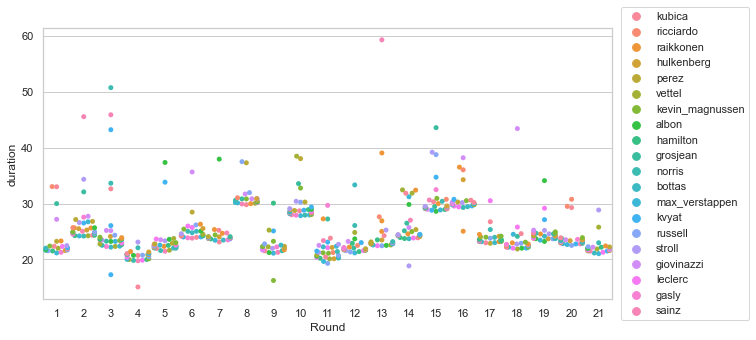

In [90]:
import seaborn as sns 
import matplotlib.pyplot as plt



fig_dims = (12,5)
fig, ax = plt.subplots(figsize = fig_dims)

sns.set(style='whitegrid', palette='muted')

swarmplot = sns.swarmplot(x='Round', y='duration', hue='driverId', ax = ax, data=df_pitstops)

#move legends manually (https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot)

box = swarmplot.get_position()
swarmplot.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
swarmplot.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

plt.show()